In [46]:
# Features gốc: 
# • mpg (miles per gallon - mức tiêu thụ nhiên liệu) 
# • cylinders (số xi-lanh) 
# • displacement (dung tích động cơ) 
# • horsepower (mã lực) 
# • weight (trọng lượng) 
# • acceleration (gia tốc) 
# • year (năm sản xuất) 
# • origin (xuất xứ) 
# Features tạo thêm: 
# • power_to_weight (tỷ lệ mã lực / trọng lượng) 
# • displacement_per_cylinder (dung tích trên mỗi xi-lanh) 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo 


# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

df = pd.DataFrame({
    'cylinders': X['cylinders'],  
    'displacement': X['displacement'],  
    'horsepower': X['horsepower'],  
    'weight': X['weight'], 
    'acceleration': X['acceleration'],  
    'model_year': X['model_year'],  
    'origin': X['origin'],  
    'mpg': y['mpg']
})
df['power_to_weight'] = df['horsepower'] / df['weight']
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cylinders                  398 non-null    int64  
 1   displacement               398 non-null    float64
 2   horsepower                 392 non-null    float64
 3   weight                     398 non-null    int64  
 4   acceleration               398 non-null    float64
 5   model_year                 398 non-null    int64  
 6   origin                     398 non-null    int64  
 7   mpg                        398 non-null    float64
 8   power_to_weight            392 non-null    float64
 9   displacement_per_cylinder  398 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 31.2 KB


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,power_to_weight,displacement_per_cylinder
0,8,307.0,130.0,3504,12.0,70,1,18.0,0.037100,38.375
1,8,350.0,165.0,3693,11.5,70,1,15.0,0.044679,43.750
2,8,318.0,150.0,3436,11.0,70,1,18.0,0.043655,39.750
3,8,304.0,150.0,3433,12.0,70,1,16.0,0.043694,38.000
4,8,302.0,140.0,3449,10.5,70,1,17.0,0.040591,37.750


In [47]:
df.isnull().sum()

cylinders                    0
displacement                 0
horsepower                   6
weight                       0
acceleration                 0
model_year                   0
origin                       0
mpg                          0
power_to_weight              6
displacement_per_cylinder    0
dtype: int64

In [48]:
df['horsepower'].replace(np.nan, df['horsepower'].mean(), inplace=True)
df['power_to_weight'] = df['horsepower'] / df['weight']
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8952\3819524197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan, df['horsepower'].mean(), inplace=True)


cylinders                    0
displacement                 0
horsepower                   0
weight                       0
acceleration                 0
model_year                   0
origin                       0
mpg                          0
power_to_weight              0
displacement_per_cylinder    0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

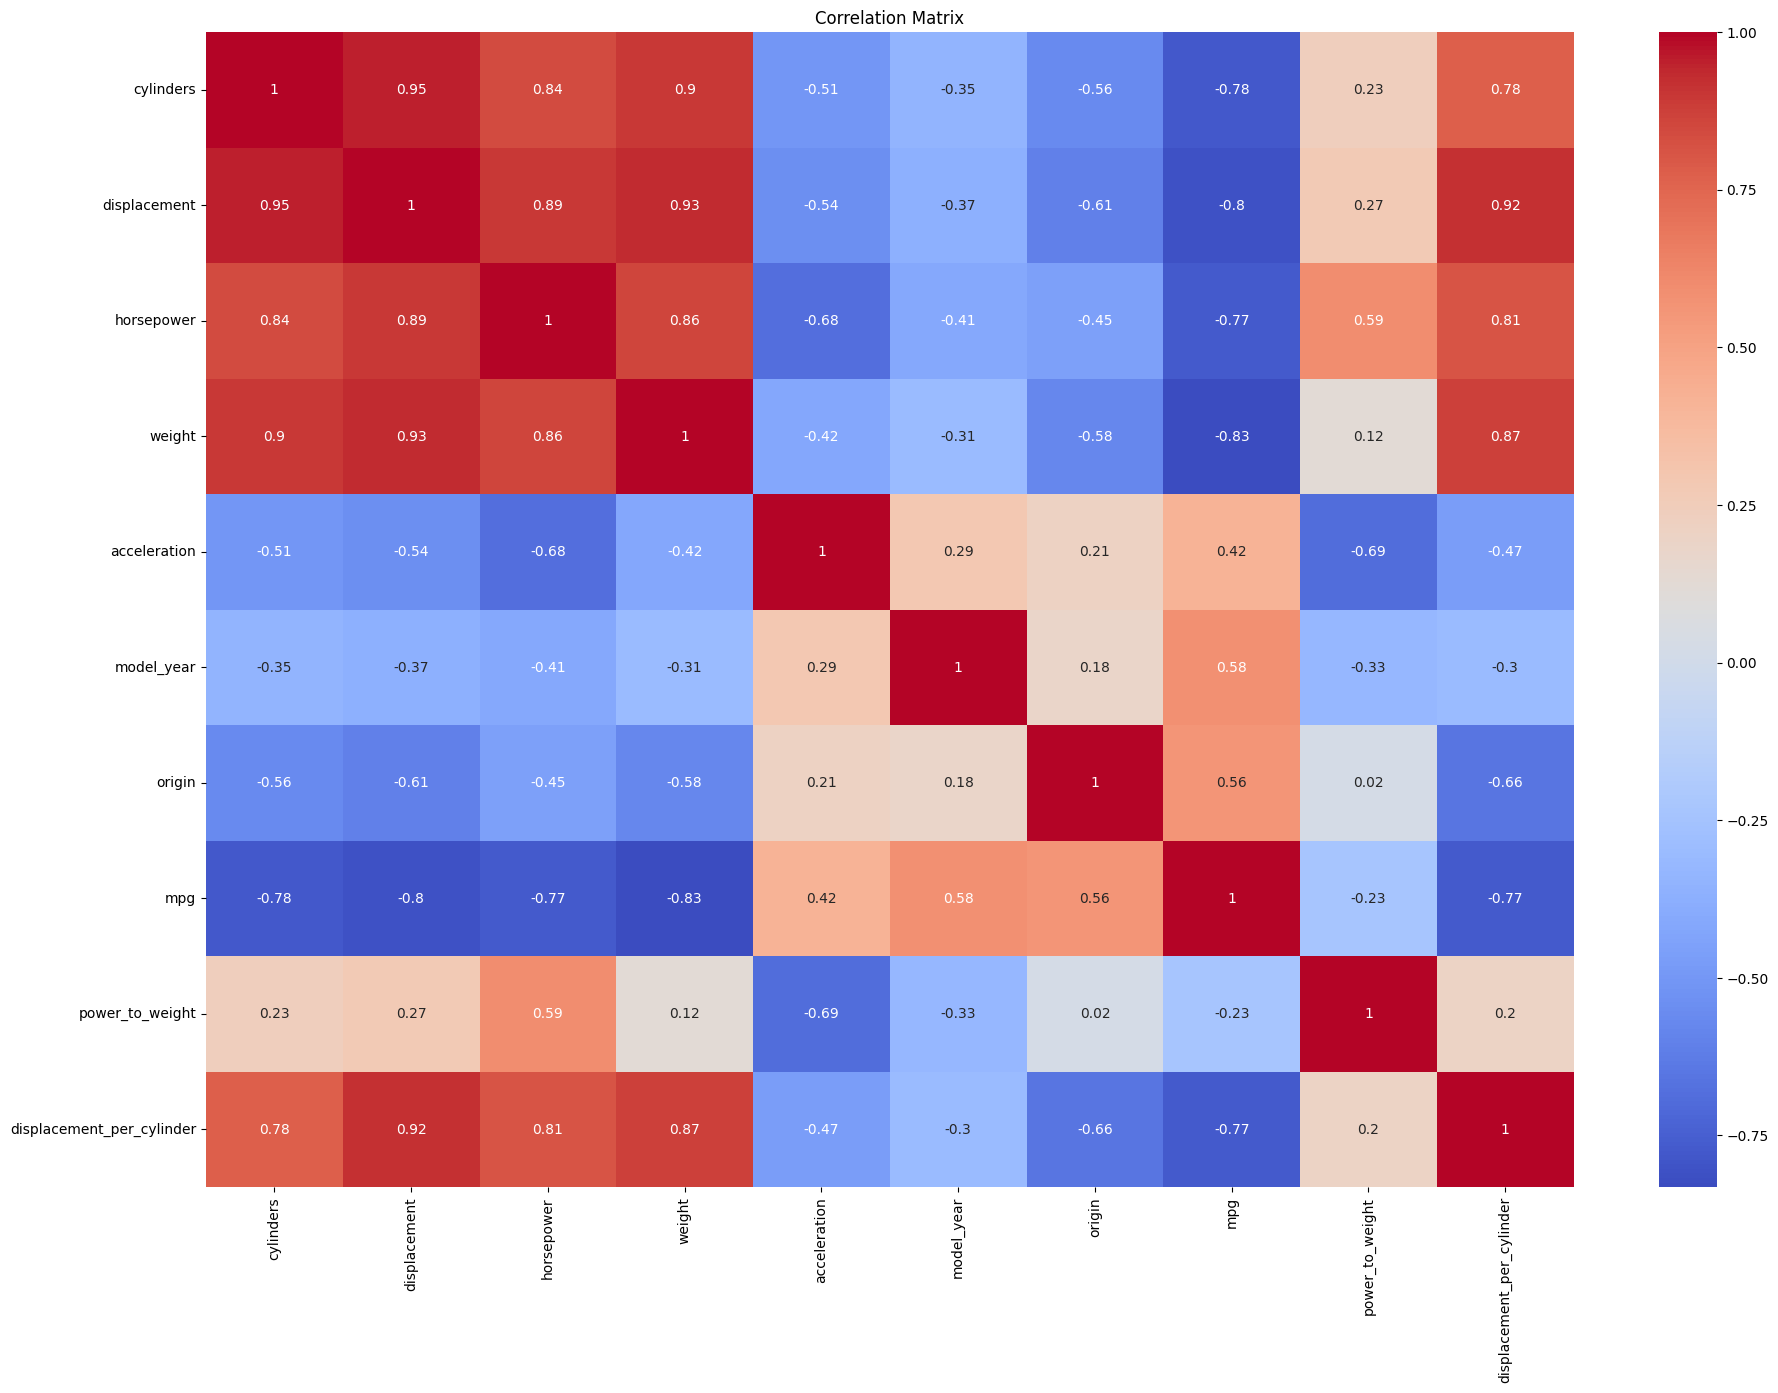

In [49]:
plt.figure(figsize=(75, 15))
    
# Correlation heatmap
plt.subplot(131)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

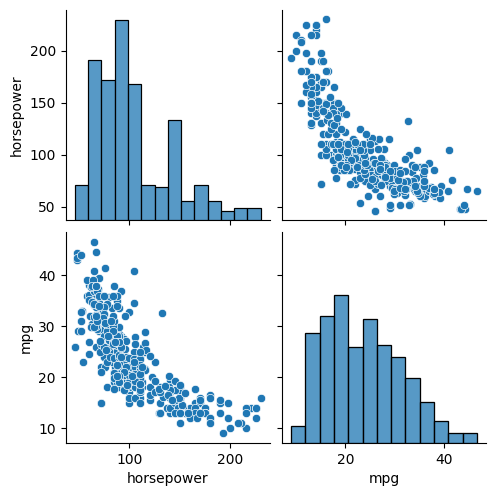

In [50]:
sns.pairplot(df[['horsepower', 'mpg']])
plt.show()

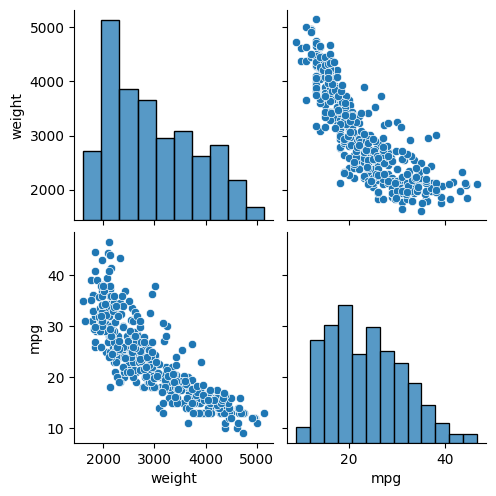

In [51]:
sns.pairplot(df[['weight', 'mpg']])
plt.show()

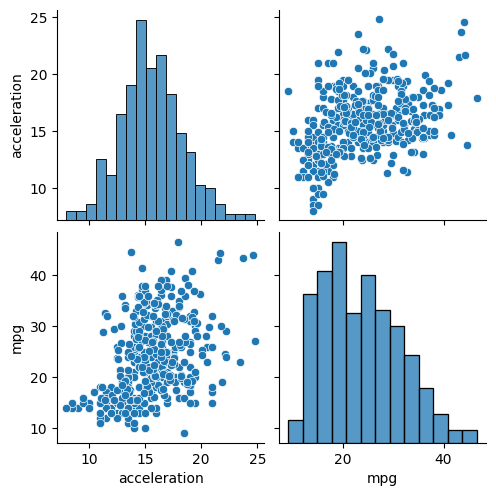

In [52]:
sns.pairplot(df[['acceleration', 'mpg']])
plt.show()

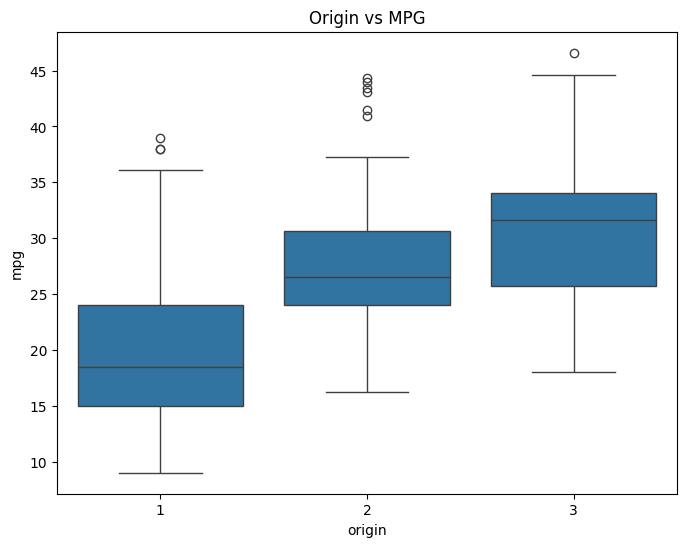

In [53]:
# Box plot cho biến phân loại 'origin'
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('Origin vs MPG')
plt.show()

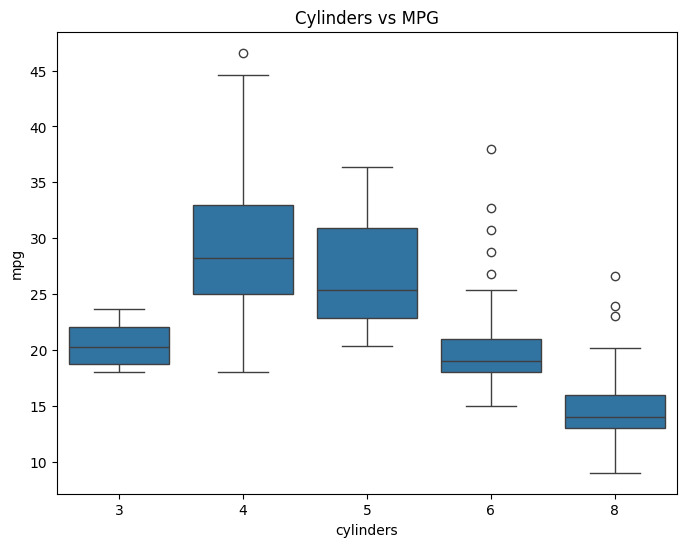

In [54]:
# Box plot cho biến phân loại 'cylinders'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('Cylinders vs MPG')
plt.show()

In [56]:
X = df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin','power_to_weight','displacement_per_cylinder']]
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
linearmodel = LinearRegression()
poly_linearmodel = LinearRegression()
polymodel = PolynomialFeatures(degree=2)
ridgemodel = Ridge()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_poly = polymodel.fit_transform(X_train)
X_test_poly = polymodel.fit_transform(X_test)

In [59]:
linearmodel.fit(X_train, y_train)
poly_linearmodel.fit(X_train_poly, y_train)
ridgemodel.fit(X_train, y_train)

y_pred_linear = linearmodel.predict(X_test)
y_pred_poly = poly_linearmodel.predict(X_test_poly)
y_pred_ridge = ridgemodel.predict(X_test)

In [62]:
print(f'R Square or score of Linear Regresion: {linearmodel.score(X_test, y_test)}')
print(f'RMSE of Linear Regresion: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}')

print(f'R Square or score of Poly: {poly_linearmodel.score(X_test_poly, y_test)}')
print(f'RMSE of Poly: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

print(f'R Square or score of Ridge: {ridgemodel.score(X_test, y_test)}')
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')

R Square or score of Linear Regresion: 0.8761275843142204
RMSE of Linear Regresion: 2.5807323127643604
R Square or score of Poly: 0.7946241389380252
RMSE of Poly: 3.3230001025273057
R Square or score of Ridge: 0.8726732677438859
RMSE of Ridge: 2.6164681514820067


In [ ]:
# Thuật toán linear regression
# điểm R square khá cao cho thấy mô hình dự đoán khá tốt. 
# điểm RMSE cho thấy sai lệch giữa kết quả dự đoán và kết quả thực tế là xấp xỉ 2.58 đơn vị

# Thuật toán Polynomial Regression bậc 2
# điểm R square khá tốt
# điểm RMSE thấp cho thấy sự chênh lệch giữa giá trị dự đoán và giá trị thực tế là xấp xỉ 3.23 đơn vị

# Thuật toán Ridge Regression
# điểm R square khá cao cho thấy mô hình dự đoán khá tốt
# điểm RMSE cho thấy sự chênh lệch của giá trị dự đoán và giá trị thực tế là khoảng 2.62 đơn vị

# Điểm R Square: Linear Regression > Ridge Regression > Polynomial Regression
# Điểm RMSE: Linear Regression > Ridge Regression > Polynomial Regression